## ML Project 1
### Jeremy Chong

## 1. Select dataset and do preliminary research.
Dataset was downloaded from [kaggle](https://www.kaggle.com/datasets/rainbowgirl/climate-data-toronto-19372018).

Features: Year, month, station, province, average temperature, rain in mm, snow in cm, total precipitation in mm.

Possible questions: Explore climate change - How has average temperature changed over the last few years? What about average snow and precipitation? 
#has maximum temperature increased?

One thing we can notice is that snow is measured in CM, but rain and precipitation are measured in MM. This is seemingly a discrepency. However, we can see from the [official government website](https://www.canada.ca/en/environment-climate-change/services/weather-general-tools-resources/frequently-asked-questions.html) that total precipitation uses the water equivalent of snow - that is the amount of water left after melting down the snow, usually at a 1:10 ratio. Thus, the data makes sense.

In [1]:
# First, import pandas and load dataset.
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
fname="Toronto_temp.csv"
df_raw=pd.read_csv(fname)
df_raw.head()

,Date/Time,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
0,31-Jan-18,"2,018",1,31,-7.0,2.0,-15.0,0.0,1.0,1.0,Winter
1,30-Jan-18,"2,018",1,30,-11.0,-7.0,-15.0,0.0,0.0,0.0,Winter
2,29-Jan-18,"2,018",1,29,-4.0,-2.0,-7.0,0.0,5.0,5.0,Winter
3,28-Jan-18,"2,018",1,28,1.0,5.0,-3.0,0.0,0.0,0.0,Winter
4,27-Jan-18,"2,018",1,27,5.0,10.0,0.0,2.0,0.0,2.0,Winter


## 2. Data Cleaning and Prep

In [2]:
#to the clean data, check for NAN values. (In this dataset, 0s are allowed! It can be 0 degrees out, or have not rained/snowed.)
nan_count = df_raw.isnull().sum()
print('Number of NaN values:', nan_count)

Number of NaN values: Date/Time             0
Year                  0
Month                 0
Day                   0
Mean Temp (C)        13
Max Temp (C)         12
Min Temp (C)         12
Total Rain (mm)      26
Total Snow (cm)      18
Total Precip (mm)    24
season                0
dtype: int64


In [3]:
#display nans
nans = df_raw[df_raw.isna().any(axis=1)]
print(nans)

      Date/Time   Year  Month  Day  Mean Temp (C)  Max Temp (C)  Min Temp (C)  \
101   23-Jan-15  2,015      1   23           -2.0           1.0          -6.0   
113   11-Jan-15  2,015      1   11           -6.0           0.0         -11.0   
294   22-Feb-16  2,016      2   22           -2.0           1.0          -5.0   
297   19-Feb-16  2,016      2   19            2.0           9.0          -5.0   
336   08-Feb-15  2,015      2    8          -11.0          -8.0         -13.0   
503   07-Mar-17  2,017      3    7            9.0          13.0           5.0   
542   30-Mar-15  2,015      3   30            3.0           8.0          -3.0   
1405  06-Jul-18  2,018      7    6           20.0          23.0          17.0   
1539  27-Jul-13  2,013      7   27            NaN           NaN           NaN   
1556  10-Jul-13  2,013      7   10            NaN           NaN           NaN   
1561  05-Jul-13  2,013      7    5            NaN           NaN           NaN   
1741  24-Aug-15  2,015      

In [4]:
#can interpolate, but safer to just drop bad rows so there's no false data - there's plenty of data, so we can afford to lose a few entries
df_clean = df_raw.dropna()
df_clean.isnull().sum()

Date/Time            0
Year                 0
Month                0
Day                  0
Mean Temp (C)        0
Max Temp (C)         0
Min Temp (C)         0
Total Rain (mm)      0
Total Snow (cm)      0
Total Precip (mm)    0
season               0
dtype: int64

In [5]:
#use describe to look for outliers
df_clean.describe()

,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
count,2861.00000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,6.60748,11.079343,8.932087,13.679972,4.153792,18.577840,3.422440,21.879692
std,3.40219,9.995331,10.776426,11.477972,10.243306,32.173745,10.049752,34.626211
min,1.00000,1.000000,-22.000000,-19.000000,-26.000000,0.000000,0.000000,0.000000
25%,4.00000,1.000000,0.000000,4.000000,-3.400000,0.000000,0.000000,0.000000
50%,7.00000,9.000000,9.400000,14.700000,4.300000,0.000000,0.000000,1.000000
75%,10.00000,20.000000,18.500000,24.000000,13.000000,26.000000,0.000000,37.600000
max,12.00000,31.000000,31.000000,36.000000,25.000000,213.900000,86.600000,213.900000


In [6]:
#we look at the means and quartile ranges, as well as averages to see if there's anything super unreasonable. 
#It looks mostly okay, so we won't mess with it too much.
#next, we check data types...
print(df_clean.dtypes)

Date/Time             object
Year                  object
Month                  int64
Day                    int64
Mean Temp (C)        float64
Max Temp (C)         float64
Min Temp (C)         float64
Total Rain (mm)      float64
Total Snow (cm)      float64
Total Precip (mm)    float64
season                object
dtype: object


they seem fine for the most part, but we can convert year to an int.

In [7]:
df_clean['Year'] = df_clean['Year'].astype(str).str.replace(',', '').astype(int)

C:\Users\Jeremy Chong\AppData\Local\Temp\ipykernel_4676\195527881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Year'].astype(str).str.replace(',', '').astype(int)


In [8]:
print(df_clean.dtypes)

Date/Time             object
Year                   int32
Month                  int64
Day                    int64
Mean Temp (C)        float64
Max Temp (C)         float64
Min Temp (C)         float64
Total Rain (mm)      float64
Total Snow (cm)      float64
Total Precip (mm)    float64
season                object
dtype: object


## 3 - Exploratory Data Analysis

In [9]:
#Next, let's drop unneeded columns - date/time column is redundant.

df = df_clean.drop(["Date/Time"], axis=1)
df.head()

,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),season
0,2018,1,31,-7.0,2.0,-15.0,0.0,1.0,1.0,Winter
1,2018,1,30,-11.0,-7.0,-15.0,0.0,0.0,0.0,Winter
2,2018,1,29,-4.0,-2.0,-7.0,0.0,5.0,5.0,Winter
3,2018,1,28,1.0,5.0,-3.0,0.0,0.0,0.0,Winter
4,2018,1,27,5.0,10.0,0.0,2.0,0.0,2.0,Winter


Now we can start exploring. Let's start by creating histograms of all the numerical categories.

array([[<Axes: title={'center': 'Min Temp (C)'}>,
        <Axes: title={'center': 'Mean Temp (C)'}>],
       [<Axes: title={'center': 'Max Temp (C)'}>, <Axes: >]], dtype=object)

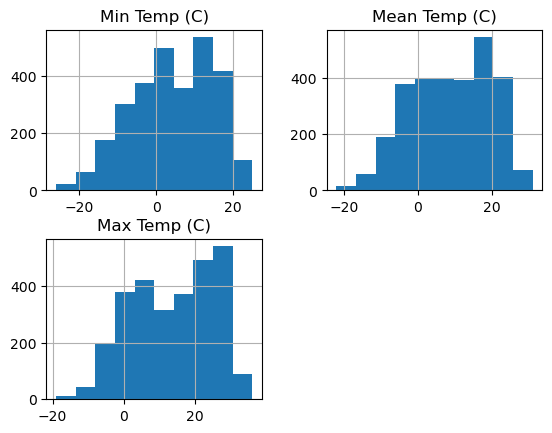

In [10]:
df.hist(["Min Temp (C)","Mean Temp (C)", "Max Temp (C)"])

From the temperature histograms, we can see that the general distribution is generally slightly right skewed. More High temperature days than low.

From the rain/snow/precipitation histograms, we can see that there is a heavy left skew; as expected, there are more dry days with 0 snow and rain than not.

In [11]:
df_num= df.drop(["season"], axis=1)
df_num

,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,2018,1,31,-7.0,2.0,-15.0,0.0,1.0,1.0
1,2018,1,30,-11.0,-7.0,-15.0,0.0,0.0,0.0
2,2018,1,29,-4.0,-2.0,-7.0,0.0,5.0,5.0
3,2018,1,28,1.0,5.0,-3.0,0.0,0.0,0.0
4,2018,1,27,5.0,10.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
2883,1942,12,1,-5.6,-1.8,-9.4,56.4,53.6,110.0
2884,1941,12,1,-1.5,1.9,-4.8,24.9,16.3,41.1
2885,1940,12,1,-3.6,0.6,-7.7,68.1,14.5,82.6
2887,1938,12,1,-2.5,1.1,-6.1,13.7,13.7,27.4


In [12]:
df_num.corr()

,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
Year,1.000000,0.011143,0.572199,0.078421,0.055438,0.102403,-0.614199,-0.418336,-0.688737
Month,0.011143,1.000000,0.019794,0.309948,0.282556,0.333568,0.062732,-0.168152,0.010498
Day,0.572199,0.019794,1.000000,0.070935,0.056531,0.086240,-0.524280,-0.323643,-0.577343
Mean Temp (C),0.078421,0.309948,0.070935,1.000000,0.991756,0.989552,0.120251,-0.396947,0.002735
Max Temp (C),0.055438,0.282556,0.056531,0.991756,1.000000,0.964329,0.129067,-0.389655,0.012779
Min Temp (C),0.102403,0.333568,0.086240,0.989552,0.964329,1.000000,0.108535,-0.396597,-0.007884
Total Rain (mm),-0.614199,0.062732,-0.524280,0.120251,0.129067,0.108535,1.000000,0.104893,0.960398
Total Snow (cm),-0.418336,-0.168152,-0.323643,-0.396947,-0.389655,-0.396597,0.104893,1.000000,0.373391
Total Precip (mm),-0.688737,0.010498,-0.577343,0.002735,0.012779,-0.007884,0.960398,0.373391,1.000000


From the correlation matrix, we can probably ignore month and day since they reset on a cycle. Thus, instead, we'll be paying attention to the year row, we can see that there is a smaller positive correlation with temperature, and a more significant negative correlation with Rain/Snow/Precipitation. 

This suggests that as time has passed, we've been getting significantly less precipitation, and that the temperatures have indeed slightly increased. Even this past couple months, we didn't really get much snow until January and had a pretty green Christmas... 

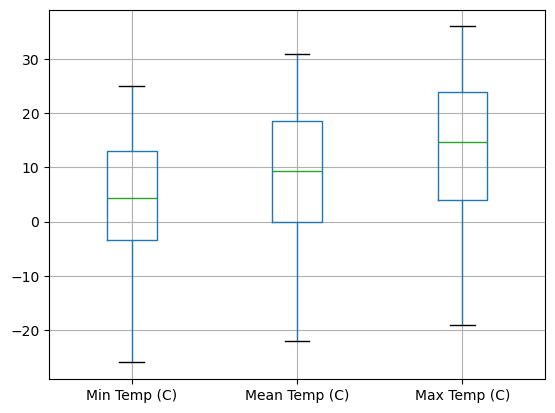

In [13]:
box=df_num.boxplot(['Min Temp (C)','Mean Temp (C)',  'Max Temp (C)'])

Nothing super notable - as expected, the minimum temperature is lower than the mean, which is lower than the max. Pretty much as expected. 

Based on the results of the correlation matrix, we can hypothesize that as years go by, we have less precipitation. We can also hypothesize that the temperature has been increasing.

## 4 - Statistical Inference

In [14]:
spearman_mat = df_num.corr(method='spearman')
spearman_mat

,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
Year,1.000000,-0.063265,0.635341,0.091667,0.071608,0.113024,-0.654297,-0.423539,-0.671989
Month,-0.063265,1.000000,0.021786,0.272685,0.250953,0.292340,0.042445,-0.175744,-0.010149
Day,0.635341,0.021786,1.000000,0.088976,0.070199,0.108814,-0.661610,-0.421972,-0.684076
Mean Temp (C),0.091667,0.272685,0.088976,1.000000,0.991387,0.989264,0.061839,-0.520911,-0.058683
Max Temp (C),0.071608,0.250953,0.070199,0.991387,1.000000,0.964233,0.070043,-0.513058,-0.051128
Min Temp (C),0.113024,0.292340,0.108814,0.989264,0.964233,1.000000,0.053429,-0.525872,-0.065068
Total Rain (mm),-0.654297,0.042445,-0.661610,0.061839,0.070043,0.053429,1.000000,0.327180,0.961126
Total Snow (cm),-0.423539,-0.175744,-0.421972,-0.520911,-0.513058,-0.525872,0.327180,1.000000,0.498648
Total Precip (mm),-0.671989,-0.010149,-0.684076,-0.058683,-0.051128,-0.065068,0.961126,0.498648,1.000000


The spearman test gives a similar result to the previous pearson test; there is a positive relationship between temperature and year, and a negative relationship between rain/snow/precipitation and year.

In [15]:
grp=df_num.groupby(["Year"])[["Min Temp (C)", "Mean Temp (C)", "Max Temp (C)", "Total Rain (mm)", "Total Snow (cm)", "Total Precip (mm)"]].mean()
grp
#sns.lineplot(data=df, x="year", y="passengers")


,Min Temp (C),Mean Temp (C),Max Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
Year,,,,,,
1937,-5.100000,-0.550000,4.050000,20.700000,16.900000,37.600000
1938,2.125000,8.066667,13.983333,41.841667,6.175000,48.033333
1939,1.900000,7.812500,13.712500,35.725000,23.812500,59.537500
1940,1.225000,6.050000,10.833333,60.508333,13.725000,74.225000
1941,2.950000,8.041667,13.141667,43.741667,8.675000,52.408333
...,...,...,...,...,...,...
2014,2.936986,7.539726,12.035616,1.657534,0.378082,1.989041
2015,3.843575,8.726257,13.564246,1.706704,0.170391,1.865922
2016,5.371901,10.195592,15.000000,1.421488,0.283747,1.730028


Even just looking quickly at the means for each column, we can see that our hypothesises fit the data - each temperature column is colder in the earlier years than the later years, and every precipitation column is higher in the earlier years compared to the later years.


## 5 - Visualization and Presentation of Findings

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

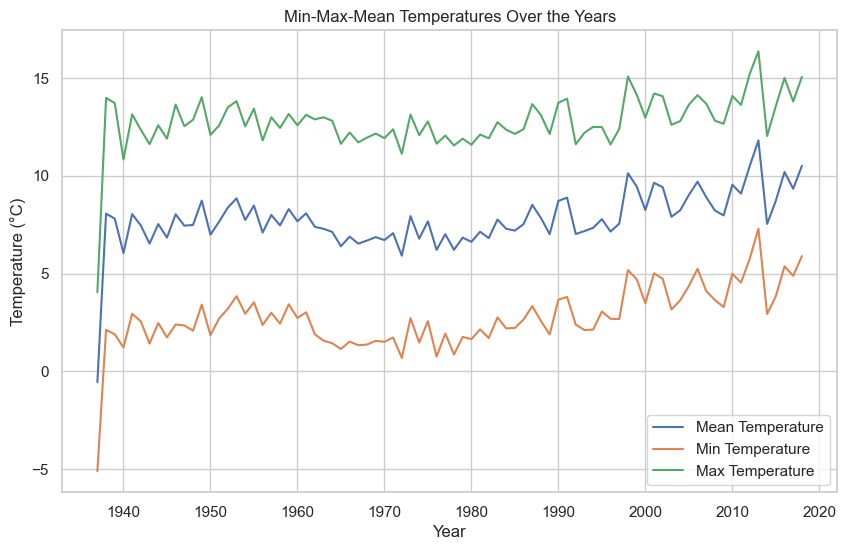

In [16]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6))  


sns.lineplot(x='Year', y='Mean Temp (C)', data=grp, label='Mean Temperature')
sns.lineplot(x='Year', y='Min Temp (C)', data=grp, label='Min Temperature')
sns.lineplot(x='Year', y='Max Temp (C)', data=grp, label='Max Temperature')


plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Min-Max-Mean Temperatures Over the Years')

plt.legend()

plt.show()


In [17]:
#adjust snow data

df_snow=df_num.copy()
df_snow['Total Snow (cm)']=df_snow['Total Snow (cm)']/10
#dividing by 10 because 1cm of snow melts down to 1mm of precip
df_snow.rename (columns={'Total Snow (cm)':"Total Snow (mm)"})

,Year,Month,Day,Mean Temp (C),Max Temp (C),Min Temp (C),Total Rain (mm),Total Snow (cm),Total Precip (mm)
0,2018,1,31,-7.0,2.0,-15.0,0.0,1.0,1.0
1,2018,1,30,-11.0,-7.0,-15.0,0.0,0.0,0.0
2,2018,1,29,-4.0,-2.0,-7.0,0.0,5.0,5.0
3,2018,1,28,1.0,5.0,-3.0,0.0,0.0,0.0
4,2018,1,27,5.0,10.0,0.0,2.0,0.0,2.0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

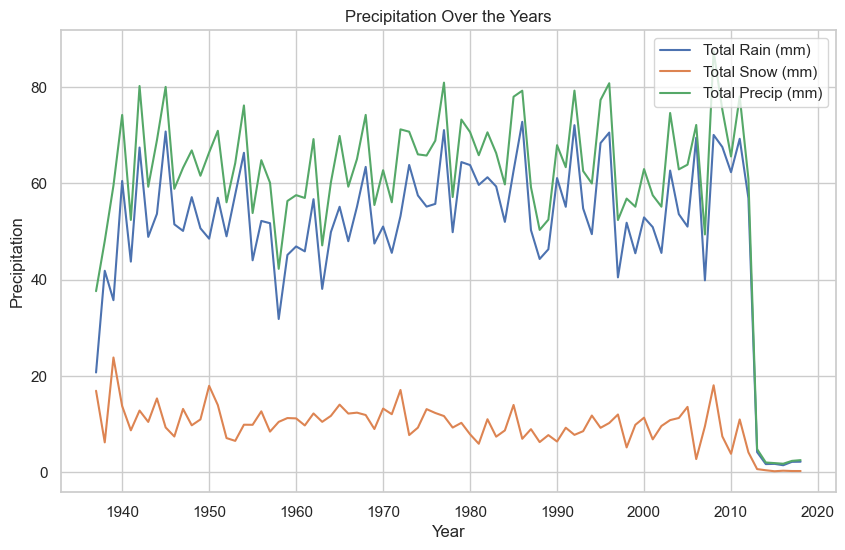

In [18]:
sns.set(style="whitegrid") 
plt.figure(figsize=(10, 6))  


sns.lineplot(x='Year', y='Total Rain (mm)', data=grp, label='Total Rain (mm)')
sns.lineplot(x='Year', y='Total Snow (cm)', data=grp, label='Total Snow (mm)')
sns.lineplot(x='Year', y='Total Precip (mm)', data=grp, label='Total Precip (mm)')


plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.title('Precipitation Over the Years')

plt.legend()

plt.show()


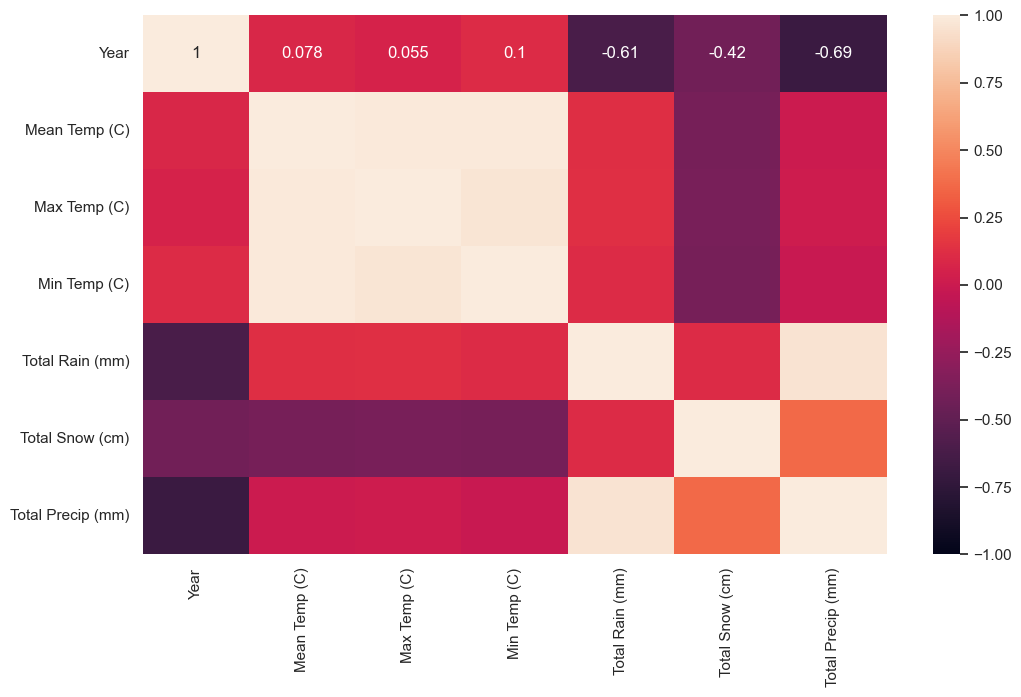

In [19]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_num.drop(['Month','Day'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()


## 6 - Report 

This dataset contains the data about the weather in Toronto from years 1937-2018. Each entry lists the day, month, and year, as well as the minimum temperature, mean temperature, and maximum temperature in degrees Celsius. Also included is the precipitation for the day - rain in millimeters, snow in centimeters, and total precipitation, again in milimeters.

On first glance, there is an error in the data, where a row with 1 cm of snow also has 1mm of precipitation, but looking into the matter we find a post on the official Canadian government website about how weather data typically equates 1cm of snow with 1mm of precipitation, as when snow is melted down into water it results in about a 10:1 ratio.

Looking at the data, we can see support for global warming - overall, temperatures are at their lowest and precipitation is at the highest in the earlier entries, while the opposite is true in the more recent years. Temperatures go up, and precipitation goes down.

For the cleaning and preprocessing steps, the first thing I did was check for NAN values first. There were indeed rows with blank values. I considered a few different options - replacing NANs with the mean, doing a forward or backward fill, or even linear interpolation, but since we had many rows of data, I'd rather not make the data inaccurate by estimating information. 

Instead, I simply dropped the rows with missing values so that all the information present would be accurate.

After that, I used describe() to look for outliers, and checked the types with df.dtypes. I wanted the years to be in integer format rather than string for the sake of charting, so I used .astype(int) to convert and .replace() to make the changes to the dataframe.

When we performed EDA, creating a correlation matrix with the Pearson correlation coefficients, we found there was a negative correlation between year and precipitation, and a positive correlation between yeard and temperatures.

For statistical tests, I used a different method for calculating correlation and tested for the Spearman coefficent, with similar results. 

Overall, we can conclude that there's a pretty good chance that global warming is real, and that temperatures are increasing while there's less rain and snow. 

## 7 - Reflection

One challenge I found was that when I initally did my charting, the numbers were off. I had forgotten to account for snow being measured in CM rather than mm, and had to alter the data to account for that.

One additional topic would be to try and find how fast the temperature increases - is it a steady rate, or does it fluctuate wildly up and down? With more data such as location, and perhaps the concentration of greenhouse gases in the region, we could try and estimate the impact of greenhouse gases on increasing temperatures.

Another analysis could be to group the data by season and explore year by season - is the largest growth in temperature in winter, spring, fall, or in summer? Does it increase evenly throughout the year, or are the colder seasons more impacted?